In [1]:
import csv
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

**Hashmap is the datastructure we will be using for this search engine.**

We have used a distributive method of managing the queries, i.e each node will store the index and in essence, this is the P2P architecture. Each node only helps in redirecting the query to the respective node iteratively. Making the hashmap from which data needs to be queried.

The keywords are distributed in such to nodes is such a way that the node IDs are A,B,C... and the key words are distributed to each node based on the alphabet the key word starts with.  

This a distributed P2P ---> The query starts at the first node which then iteratively redirects it to the required node.

In [3]:
hashmap = {}

with open ('dictionaries.csv','r') as csvfile:
    read = csv.reader(csvfile, delimiter = ',')
    next(read, None)
    for row in read:
        key  = row[0][0].upper()
        dict_inside = {}
        value_inside = []
        dict_inside['keyword'] = row[0]
        dict_inside['URL'] = row[1].replace('\n','').split(',')
        value_inside.append(dict_inside)

        if key in hashmap:
            hashmap[key].append(dict_inside)
        else:
            hashmap[key] = value_inside

print (hashmap)

{'P': [{'keyword': 'Printing', 'URL': ['https://www.ted.com/talks/heather_barnett_what_humans_can_learn_from_semi_intelligent_slime_1', 'https://www.ted.com/talks/lee_cronin_print_your_own_medicine', 'https://www.ted.com/talks/lisa_harouni_a_primer_on_3d_printing']}, {'keyword': 'peace', 'URL': ['https://www.ted.com/talks/gayle_tzemach_lemmon_meet_the_first_women_to_fight_on_the_front_lines_of_an_american_war']}, {'keyword': 'philanthropy', 'URL': ['https://www.ted.com/talks/sherwin_nuland_on_hope']}, {'keyword': 'philosophy', 'URL': ['https://www.ted.com/talks/aaron_o_connell_making_sense_of_a_visible_quantum_object', 'https://www.ted.com/talks/jim_holt_why_does_the_universe_exist']}, {'keyword': 'physics', 'URL': ['https://www.ted.com/talks/garrett_lisi_on_his_theory_of_everything']}, {'keyword': 'Planets', 'URL': ['https://www.ted.com/talks/aomawa_shields_how_we_ll_find_life_on_other_planets', 'https://www.ted.com/talks/brian_greene_why_is_our_universe_fine_tuned_for_life', 'https:/

In [4]:
hashmap.keys()

dict_keys(['P', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'R', 'S', 'T', 'U', 'V'])

In [5]:
#saving the hashmap to json file for further usage

import json
with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(hashmap, f, indent=4)

In [7]:
#1000 random queries have been generated from the set of keywords we have. 

counter_dict = {}
for keys in hashmap:
    counter_dict[keys] = 0

file1 = open('queries.txt', 'r') 
Lines = file1.readlines()
for line in Lines:
    qry_list = line.split(',')
    for words in qry_list:
        nd = words[0].upper()
        counter_dict[nd] += 1

print (counter_dict)

{'P': 122, 'A': 448, 'B': 310, 'C': 474, 'D': 233, 'E': 186, 'F': 81, 'G': 186, 'H': 134, 'I': 133, 'L': 70, 'M': 177, 'N': 56, 'O': 14, 'R': 16, 'S': 138, 'T': 203, 'U': 5, 'V': 17}


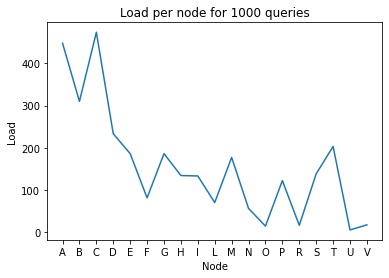

In [8]:
x = [] 
y = []
for key in sorted(counter_dict.keys()):
    x.append(key)
    y.append(counter_dict[key])

plt.plot(x,y)
plt.title("Load per node for 1000 queries")
plt.xlabel("Node")
plt.ylabel("Load");

In [87]:
data = pd.read_csv('dictionaries.csv')
keywords = []
count_url = []
count = 0
for i in data['Keyword']:
    count_url.append(len(data['URLs'][count].split('\n,')))
    keywords.append(i)
    count +=1

zipped = zip(keywords,count_url)
wc_dict = dict(zipped)

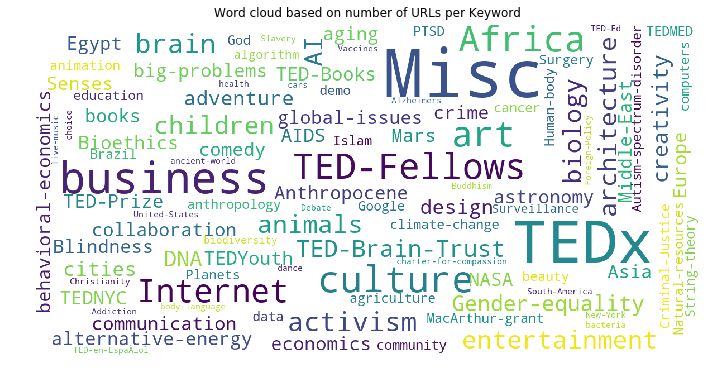

In [90]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    #).generate(str(data))
     ).generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.title("Word cloud based on number of URLs per Keyword")
    plt.show()

show_wordcloud(wc_dict)

In [9]:
print(hashmap)

{'P': [{'keyword': 'Printing', 'URL': ['https://www.ted.com/talks/heather_barnett_what_humans_can_learn_from_semi_intelligent_slime_1', 'https://www.ted.com/talks/lee_cronin_print_your_own_medicine', 'https://www.ted.com/talks/lisa_harouni_a_primer_on_3d_printing']}, {'keyword': 'peace', 'URL': ['https://www.ted.com/talks/gayle_tzemach_lemmon_meet_the_first_women_to_fight_on_the_front_lines_of_an_american_war']}, {'keyword': 'philanthropy', 'URL': ['https://www.ted.com/talks/sherwin_nuland_on_hope']}, {'keyword': 'philosophy', 'URL': ['https://www.ted.com/talks/aaron_o_connell_making_sense_of_a_visible_quantum_object', 'https://www.ted.com/talks/jim_holt_why_does_the_universe_exist']}, {'keyword': 'physics', 'URL': ['https://www.ted.com/talks/garrett_lisi_on_his_theory_of_everything']}, {'keyword': 'Planets', 'URL': ['https://www.ted.com/talks/aomawa_shields_how_we_ll_find_life_on_other_planets', 'https://www.ted.com/talks/brian_greene_why_is_our_universe_fine_tuned_for_life', 'https:/

In [16]:
key= "main"
value=hashmap
master={}
master.update({key:value})
print(master.keys())

dict_keys(['main'])


In [18]:
#1000 random queries have been generated from the set of keywords we have. 

counter_dict = {}
for keys in master:
    counter_dict[keys] = 0

file1 = open('queries.txt', 'r') 
Lines = file1.readlines()
for line in Lines:
    qry_list = line.split(',')
    for words in qry_list:
        nd = words[0].upper()
        counter_dict[nd] += 1

print (counter_dict)


KeyError: 'T'